# Worksheet 19

Name: Dima Kazlouski
UID: U49144585

### Topics

- Linear Model Evaluation

## Linear Model Evaluation

Notice that R^2 only increases with the number of explanatory variables used. Hence the need for an adjusted R^2 that penalizes for insignificant explanatory variables.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

SAMPLE_SIZE = 100
beta = [1, 5]
X = -10.0 + 10.0 * np.random.random(SAMPLE_SIZE)
Y = beta[0] + beta[1] * X + np.random.randn(SAMPLE_SIZE)

for i in range(1, 15):
    X_transform = PolynomialFeatures(degree=i, include_bias=False).fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_transform, Y)
    print(model.score(X_transform, Y))

0.9961986004476474
0.9962126041958891
0.9962778480485404
0.9962787176749703
0.9963289080367222
0.9963357484297855
0.9963446093538637
0.996354330547017
0.9963646396913965
0.9963725491932232
0.996471982818703
0.9964778334104217
0.996476527777216
0.9964495652895904


a) Hypothesis Testing Sandbox (follow along in class) [Notes](https://medium.com/@gallettilance/hypothesis-testing-almost-everything-you-need-to-know-ce812ded50b)

0.3124999999999998
[0, 1, 0, 0, 0]
0.15624999999999997


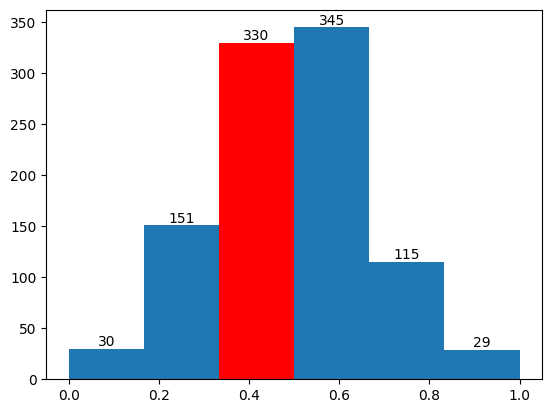

In [2]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

flips = [1, 0, 0, 1, 0]

def num_successes(flips):
    return sum(flips)

print(binom.pmf(num_successes(flips), len(flips), 1/2))

SAMPLE_SIZE = 5
flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
print(flips)
print(binom.pmf(num_successes(flips), SAMPLE_SIZE, 1/2))

p_est = []

for _ in range(1000):
    flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
    p_est.append(sum(flips) / SAMPLE_SIZE)

fig, ax = plt.subplots()
_, bins, patches = ax.hist(p_est, bins=SAMPLE_SIZE + 1)
p = np.digitize([2/5], bins)
patches[p[0]-1].set_facecolor('r')
ax.bar_label(patches)
plt.show()

b) Plot a data set and fitted line through the point when there is no relationship between X and y.

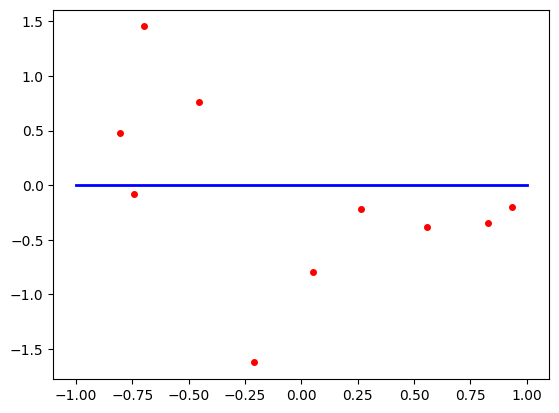

In [13]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 10

xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
constant = 0
y = constant + np.random.randn(SAMPLE_SIZE)  

intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T
beta = [constant, 0] 
xplot = np.linspace(-1, 1, 20)
yestplot = [beta[0]] * len(xplot) 
plt.plot(xplot, yestplot, 'b-', lw=2)
plt.plot(xlin, y, 'ro', markersize=4)
plt.show()


c) Using the above code, plot a histogram of the parameter estimates for the slope after generating `1000` independent datasets. Comment on what the plot means. Increase the sample size to see what happens to the plot. Explain.

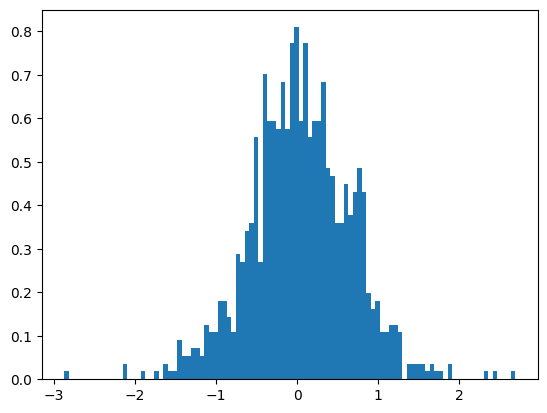

In [14]:
beta_hist = []

#SAMPLE_SIZE = 50


for _ in range(1000):
    xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
    y = 0 + np.random.randn(SAMPLE_SIZE)  # y is just noise with no relationship to xlin
    X = xlin.reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    beta_hist.append(model.coef_[0])  # Append the slope estimate

fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
plt.show()

The above histogram shows the distribution of estimated slope parameter from 1000 independent datasets where the true slope is 0. The distribution is centered around 0 which indicates that on average the linear regression model is estimating the correct slope. There is however some spead in the estimate due to random noise in the data which makes sense given a small sample size of 10. When the sample size increases to 50 there is a more narrow distribuition and the variability decreases. 

d) We know that:

$$\hat\beta-\beta \sim \mathcal{N}(0,\sigma^2 (X^TX)^{-1})$$

thus for each component $k$ of $\hat\beta$ (here there are only two - one slope and one intercept)

$$\hat\beta_k -\beta_k \sim \mathcal{N}(0, \sigma^2 S_{kk})$$

where $S_{kk}$ is the $k^\text{th}$ diagonal element of $(X^TX)^{-1}$. Thus, we know that 

$$z_k = \frac{\hat\beta_k -\beta_k}{\sqrt{\sigma^2 S_{kk}}} \sim \mathcal{N}(0,1)$$

Verify that this is the case through a simulation and compare it to the standard normal pdf by plotting it on top of the histogram.

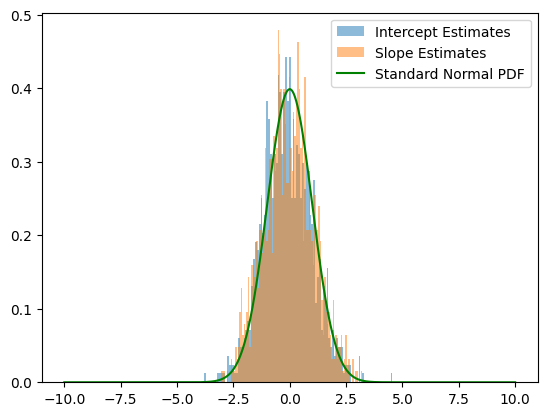

In [15]:
from scipy.stats import norm

SAMPLE_SIZE = 50
N_DATASETS = 1000
z_intercept_hist = []
z_slope_hist = []

for _ in range(N_DATASETS):
    x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
    y = 0 + np.random.randn(SAMPLE_SIZE)  # No true slope, just an intercept at 0
    X = x.reshape(-1, 1)
    X_with_intercept = np.hstack([np.ones((SAMPLE_SIZE, 1)), X])  
    model = LinearRegression()
    model.fit(X_with_intercept, y)
    residuals = y - model.predict(X_with_intercept)
    sigma_hat = np.std(residuals)
    
    # Calculate variance-covariance matrix of beta_hat
    var_beta_hat = sigma_hat**2 * np.linalg.inv(X_with_intercept.T @ X_with_intercept)
    
    # Standardize the estimates for both slope and intercept
    z_intercept = (model.intercept_ - 0) / np.sqrt(var_beta_hat[0, 0])
    z_slope = (model.coef_[1] - 0) / np.sqrt(var_beta_hat[1, 1])
    
    z_intercept_hist.append(z_intercept)
    z_slope_hist.append(z_slope)

xs = np.linspace(-10, 10, 1000)
fig, ax = plt.subplots()
ax.hist(z_intercept_hist, bins=100, density=True, alpha=0.5, label='Intercept Estimates')
ax.hist(z_slope_hist, bins=100, density=True, alpha=0.5, label='Slope Estimates')
ax.plot(xs, norm.pdf(xs), color='green', label='Standard Normal PDF')
ax.legend()
plt.show()

e) Above we normalized $\hat\beta$ by subtracting the mean and dividing by the standard deviation. While we know that the estimate of beta is an unbiased estimator, we don't know the standard deviation. So in practice when doing a hypothesis test where we want to assume that $\beta = 0$, we can simply use $\hat\beta$ in the numerator. However we don't know the standard deviation and need to use an unbiased estimate of the standard deviation instead. This estimate is the standard error `s`

$$s = \sqrt{\frac{RSS}{n - p}}$$

where p is the number of parameters beta (here there are 2 - one slope and one intercept). This normalized $\hat\beta$ can be shown to follow a t-distribution with `n-p` degrees of freedom. Verify this is the case with a simulation.

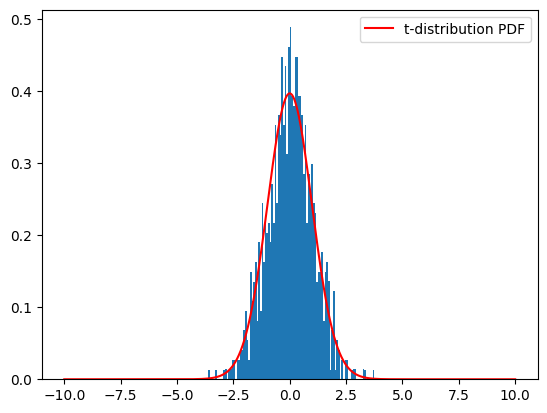

In [16]:
from scipy.stats import t

def standard_error(ytrue, ypred, p):
    # Calculate the residual sum of squares (RSS)
    rss = np.sum((ytrue - ypred)**2)
    # Calculate the standard error
    return np.sqrt(rss / (len(ytrue) - p))

SAMPLE_SIZE = 50
N_DATASETS = 1000
p = 2  
t_beta_hist = []

for _ in range(N_DATASETS):
    x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
    y = 0 + np.random.randn(SAMPLE_SIZE)  
    X = x.reshape(-1, 1)
    X_with_intercept = np.hstack([np.ones((SAMPLE_SIZE, 1)), X]) 
    model = LinearRegression()
    model.fit(X_with_intercept, y)
    y_pred = model.predict(X_with_intercept)
    s = standard_error(y, y_pred, p)
    
    # Calculate the t-statistic for slope
    t_slope = model.coef_[1] / (s * np.sqrt(np.linalg.inv(X_with_intercept.T @ X_with_intercept)[1, 1]))
    t_beta_hist.append(t_slope)

xs = np.linspace(-10, 10, 1000)
fig, ax = plt.subplots()
ax.hist(t_beta_hist, bins=100, density=True)
ax.plot(xs, t.pdf(xs, df=SAMPLE_SIZE - p), color='red', label='t-distribution PDF')
ax.legend()
plt.show()

f) You are given the following dataset:

[0.50155603 1.19902827]


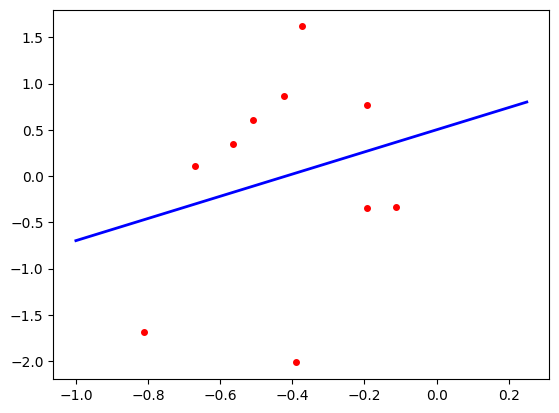

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, -0.42403586, -0.8114285, -0.38986946, -0.37384161, -0.50930229])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389, 0.86592388, -1.68912015, -2.01463592, 1.61798563, 0.60557414])

intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta_hat)

xplot = np.linspace(-1,.25,20)
yestplot = beta_hat[0] + beta_hat[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(x, y,'ro',markersize=4)
plt.show()


what is the probability of observing a dataset at least as extreme as the above assuming $\beta = 0$ ?

In [18]:
import numpy as np
from scipy import stats

# Given x and y
x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, 
              -0.42403586, -0.8114285, -0.38986946, -0.37384161, -0.50930229])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389,
              0.86592388, -1.68912015, -2.01463592, 1.61798563, 0.60557414])

# Calculate beta_hat
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

# Calculate residuals and standard error of the slope estimate
residuals = y - (beta_hat[0] + beta_hat[1] * x)
degrees_of_freedom = len(x) - 2
residual_standard_error = np.sqrt(np.sum(residuals**2) / degrees_of_freedom)
XtX_inv = np.linalg.inv(X.T @ X)
se_beta = np.sqrt(XtX_inv[1, 1]) * residual_standard_error

# Calculate the t-statistic for the slope
t_statistic = beta_hat[1] / se_beta

# Calculate the two-tailed p-value
p_value = 2 * stats.t.sf(np.abs(t_statistic), df=degrees_of_freedom)

print(f'The t-statistic is: {t_statistic}')
print(f'The p-value is: {p_value}')


The t-statistic is: 0.6842586696389723
The p-value is: 0.5131420720905754


Based on the p-value it looks like the probability of observing a test statistic as extreme as the one calculated from the sample data is 51.3% (assuming the true slope is 0). 